STEP 1: Loading Dataset...
 - Data Loaded. Rows: 297

STEP 2: Train-Test Split
 - Training Set: 237 samples
 - Testing Set:  60 samples

STEP 3: Training Model...

STEP 4: Evaluation Metrics
 - Accuracy:  83.33% (Overall Correctness)
 - Precision: 84.62% (Trustworthiness of Positive Prediction)
 - Recall:    78.57% (Ability to find Disease cases)
 - F1 Score:  81.48% (Harmonic Mean)

STEP 5: Generating Visualizations...


/tmp/ipython-input-1348659618.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette=colors, ax=ax3)


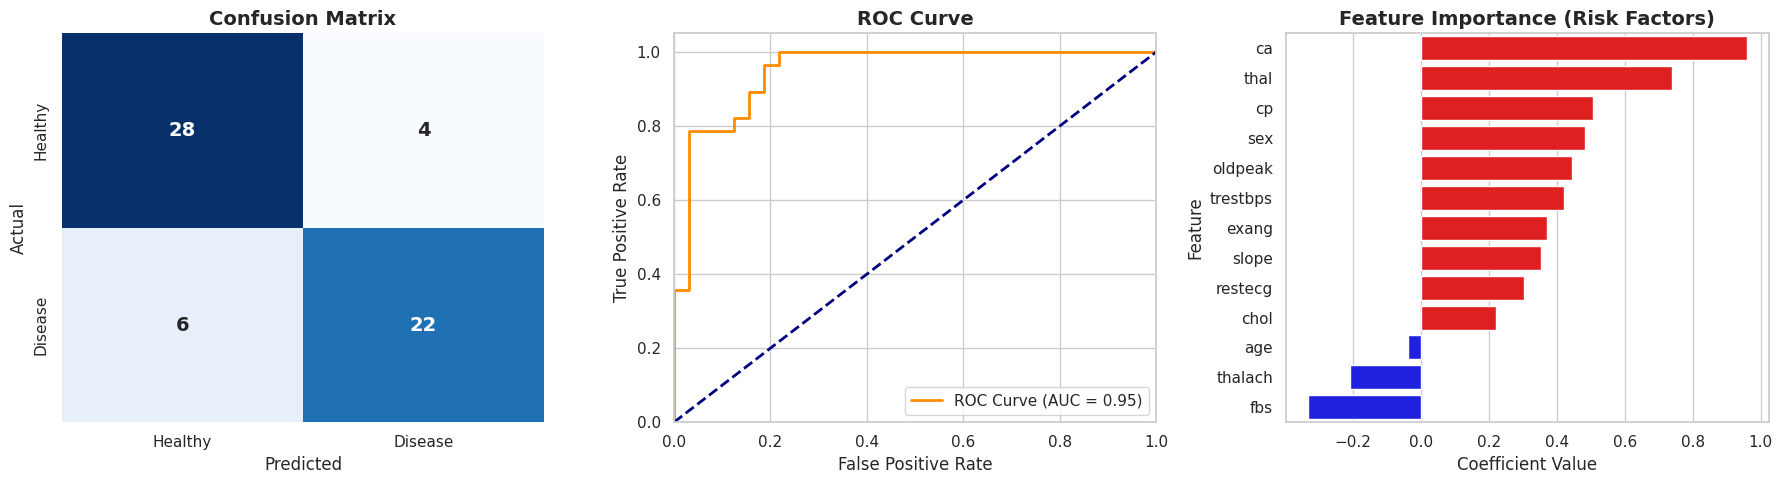

In [6]:

# Heart Disease Prediction using Logistic Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

# SETTING PROFESSIONAL VISUALIZATION THEME
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

def load_and_clean_data():
    """
    Loads UCI Heart Disease dataset and handles missing values.
    """
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
    column_names = [
        'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
    ]

    print("STEP 1: Loading Dataset...")
    df = pd.read_csv(url, names=column_names, na_values='?', skipinitialspace=True)

    # Drop rows with missing values
    df.dropna(inplace=True)

    # Convert target: 0 is healthy, 1-4 is disease. Map to Binary (0 vs 1).
    df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

    print(f" - Data Loaded. Rows: {len(df)}")
    return df

def perform_split(df):
    """
    Splits data into Train (80%) and Test (20%) sets.
    """
    X = df.drop('target', axis=1) # Features
    y = df['target']              # Target

    # Stratify ensures balanced disease/healthy ratio in both sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print("\nSTEP 2: Train-Test Split")
    print(f" - Training Set: {X_train.shape[0]} samples")
    print(f" - Testing Set:  {X_test.shape[0]} samples")

    return X_train, X_test, y_train, y_test, X.columns

def train_model(X_train, y_train):
    """
    Trains a Logistic Regression model within a Scaling Pipeline.
    """
    print("\nSTEP 3: Training Model...")
    pipeline = make_pipeline(
        StandardScaler(),
        LogisticRegression(random_state=42)
    )
    pipeline.fit(X_train, y_train)
    return pipeline

def evaluate_metrics(model, X_test, y_test):
    """
    Calculates and prints performance scores.
    """
    print("\nSTEP 4: Evaluation Metrics")
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f" - Accuracy:  {acc:.2%} (Overall Correctness)")
    print(f" - Precision: {prec:.2%} (Trustworthiness of Positive Prediction)")
    print(f" - Recall:    {rec:.2%} (Ability to find Disease cases)")
    print(f" - F1 Score:  {f1:.2%} (Harmonic Mean)")

    return y_pred

def visualize_results(model, X_test, y_test, y_pred, feature_names):
    """
    Generates 3 Key Visualizations: Confusion Matrix, ROC Curve, Feature Importance
    """
    print("\nSTEP 5: Generating Visualizations...")

    # SETUP: Create a figure with 3 subplots
    fig = plt.figure(figsize=(18, 5))

    # PLOT 1: Confusion Matrix Heatmap
    ax1 = fig.add_subplot(1, 3, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1,
                annot_kws={"size": 14, "weight": "bold"})
    ax1.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    ax1.set_xticklabels(['Healthy', 'Disease'])
    ax1.set_yticklabels(['Healthy', 'Disease'])

    # PLOT 2: ROC Curve
    # Shows trade-off between True Positive Rate and False Positive Rate
    ax2 = fig.add_subplot(1, 3, 2)
    y_prob = model.predict_proba(X_test)[:, 1] # Probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
    ax2.legend(loc="lower right")

    # PLOT 3: Feature Importance (Coefficients)
    # Extracting coefficients from the pipeline
    ax3 = fig.add_subplot(1, 3, 3)
    coefficients = model.named_steps['logisticregression'].coef_[0]
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    # Color mapping: Red for positive (Risk Factors), Blue for negative (Protective Factors)
    colors = ['red' if x > 0 else 'blue' for x in feature_importance['Importance']]

    sns.barplot(x='Importance', y='Feature', data=feature_importance, palette=colors, ax=ax3)
    ax3.set_title('Feature Importance (Risk Factors)', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Coefficient Value')

    plt.tight_layout()
    plt.show()

# MAIN EXECUTION
if __name__ == "__main__":
    # 1. Load Data
    data = load_and_clean_data()

    # 2. Split Data (Getting feature names for visualization later)
    X_train_set, X_test_set, y_train_set, y_test_set, feat_names = perform_split(data)

    # 3. Train Model
    lr_pipeline = train_model(X_train_set, y_train_set)

    # 4. Metrics
    predictions = evaluate_metrics(lr_pipeline, X_test_set, y_test_set)

    # 5. Elite Visualizations
    visualize_results(lr_pipeline, X_test_set, y_test_set, predictions, feat_names)